### Contents of this notebook

I plotted the number of articles published per month to see what months were most eventful, and what events were deemed newsworthy. I also created a wordcloud to analyze what words were most often featured in the news headlines. To extract meaningful words out of all the most featured words, I created a frequency dictionary without stopwords.

Initial conclusions: 
Mandalay and Sagaing, two locations in upper Myanmar were featured more often in news headlines than Yangon, the old capital of Myanmar in the south, which has the highest number of urban population. This reaffirms that most of the junta soldiers' attacks on civilians had been concentrated in rural areas in upper Myanmar (in the Mandalay/Sagaing region). 

Things I'd like to improve:
Currently, the data is based on news articles that I downloaded, so it's static and not easily scalable. 
I also hard coded the page numbers to be downloaded (from 40 to 150) because those were the page numbers from when I collected this data. But as this website adds more news to its page, these page numbers will no longer be accurate. Need to fix the "for i in range (40,150)" to make the data replicable. 

In [1]:
import requests
import os
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# download webpages of most read news articles from Feb 2021-Dec 2021

if not os.path.exists("MMN_mostread"):
    os.mkdir("MMN_mostread")
    
    for i in range(40, 150): 
        url = f"https://www.myanmar-now.org/en/most-read?page={i}"
        response = requests.get(url)
        response.raise_for_status()
        
        with open(os.path.join("MMN_mostread", str(i)+".html"), "w", encoding="utf-8") as f:
            f.write(response.text)

In [4]:
# convert each html page to df
def html_to_df(path):

    with open(path, encoding="utf-8") as f:
        html = f.read()
    soup = BeautifulSoup(html)
    data = {}
    news_titles = [title.text.strip() for title in soup.find_all('div', class_ = 'news-title')]
    pub_dates = [date['content'].split('T')[0] for date in soup.find_all('span', class_ = 'date-display-single')]
    data['title'] = news_titles[1:] #removing the highlighted article on each page because it's repeated
    data['date'] = pub_dates[1:]
    
    return pd.DataFrame(data, columns = data.keys())

# append all the dfs into one big df

dfs = []
for i in range(40, 150): 
    df = html_to_df(os.path.join('MMN_mostread', str(i)+'.html'))
    dfs.append(df)
    
big_df = pd.concat(dfs, ignore_index=True)

pd.set_option("display.max_colwidth", None) 
big_df.head()

,title,date
0,More Magway villagers fall victim to marauding regime forces,2022-01-03
1,Junta forces and military-backed armed group terrorise Sagaing residents,2022-01-03
2,Junta township chair killed by guerrilla force’s bomb in Sagaing,2022-01-03
3,"NLD leaders, student activists receive prison sentences in year-end blitz",2021-12-31
4,Cruelty for its own sake: How Myanmar’s junta uses torture as a tool of oppression,2021-12-31


In [5]:
# convert dates from string into datetime object
big_df['date'] = pd.to_datetime(big_df.date, format='%Y-%m-%d')
big_df.head()

,title,date
0,More Magway villagers fall victim to marauding regime forces,2022-01-03
1,Junta forces and military-backed armed group terrorise Sagaing residents,2022-01-03
2,Junta township chair killed by guerrilla force’s bomb in Sagaing,2022-01-03
3,"NLD leaders, student activists receive prison sentences in year-end blitz",2021-12-31
4,Cruelty for its own sake: How Myanmar’s junta uses torture as a tool of oppression,2021-12-31


### Cleaning the dataset to only include news articles from Feb-Dec 2021

In [6]:
# drop the three articles from Jan 2022
df_2021 = big_df.drop([0,1,2])
df_2021 = df_2021.reset_index()
df_2021 = df_2021.drop(columns=['index'])
df_2021.head()

,title,date
0,"NLD leaders, student activists receive prison sentences in year-end blitz",2021-12-31
1,Cruelty for its own sake: How Myanmar’s junta uses torture as a tool of oppression,2021-12-31
2,Resumed clashes near Mongko leave at least a dozen junta soldiers dead,2021-12-31
3,Junta issues order to ignore notifications from international courts,2021-12-30
4,"Junta statement ‘full of lies’, says KNU spokesperson",2021-12-30


In [7]:
df_2021.tail()

,title,date
1312,Aung San Suu Kyi and ousted president Win Myint charged under laws that carry three-year sentences,2021-02-03
1313,Myanmar descends back into dictatorship as military declares state of emergency,2021-02-01
1314,Suu Kyi calls for public resistance against coup,2021-02-01
1315,Domestic election observers urge all parties to accept result of vote,2021-01-30
1316,Tanks appear on city streets as fears of a possible coup continue,2021-01-29


In [8]:
df_2021 = df_2021.drop([1315, 1316])
df_2021.tail()

,title,date
1310,Three Saffron Revolution monks among those detained in February 1 raids,2021-02-03
1311,Veteran activist calls for civil disobedience in wake of coup,2021-02-03
1312,Aung San Suu Kyi and ousted president Win Myint charged under laws that carry three-year sentences,2021-02-03
1313,Myanmar descends back into dictatorship as military declares state of emergency,2021-02-01
1314,Suu Kyi calls for public resistance against coup,2021-02-01


### Plotting number of articles published by month in 2021

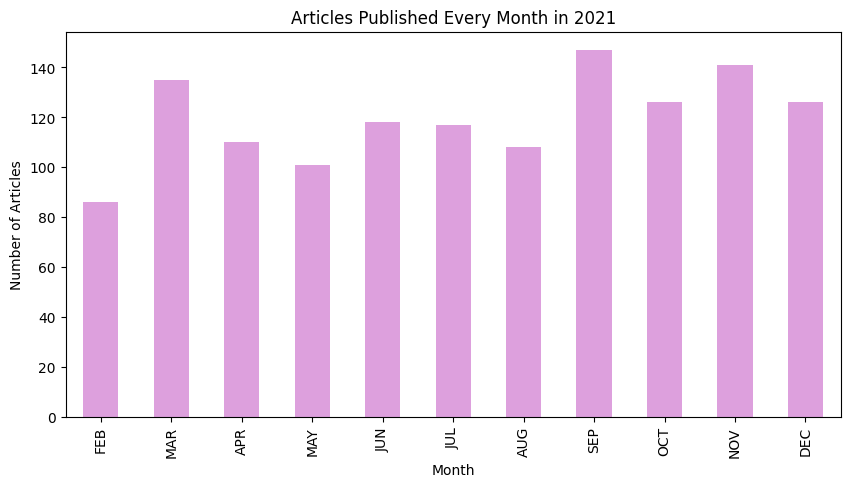

In [8]:
ax = df_2021.groupby(df_2021.date.dt.month)['title'].count().plot(kind='bar', figsize=(10, 5), color='plum')
months = ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
ax.set_xticklabels(months)
ax.set(xlabel='Month', ylabel='Number of Articles', title="Articles Published Every Month in 2021")
plt.show()

What days had the most articles published?

In [9]:
df_2021['date'].value_counts().head(10)

2021-11-09    9
2021-10-07    8
2021-03-17    8
2021-10-26    8
2021-09-10    8
2021-09-02    8
2021-09-08    8
2021-10-05    8
2021-11-08    7
2021-11-10    7
Name: date, dtype: int64

A wordcloud of most common words in these news headlines

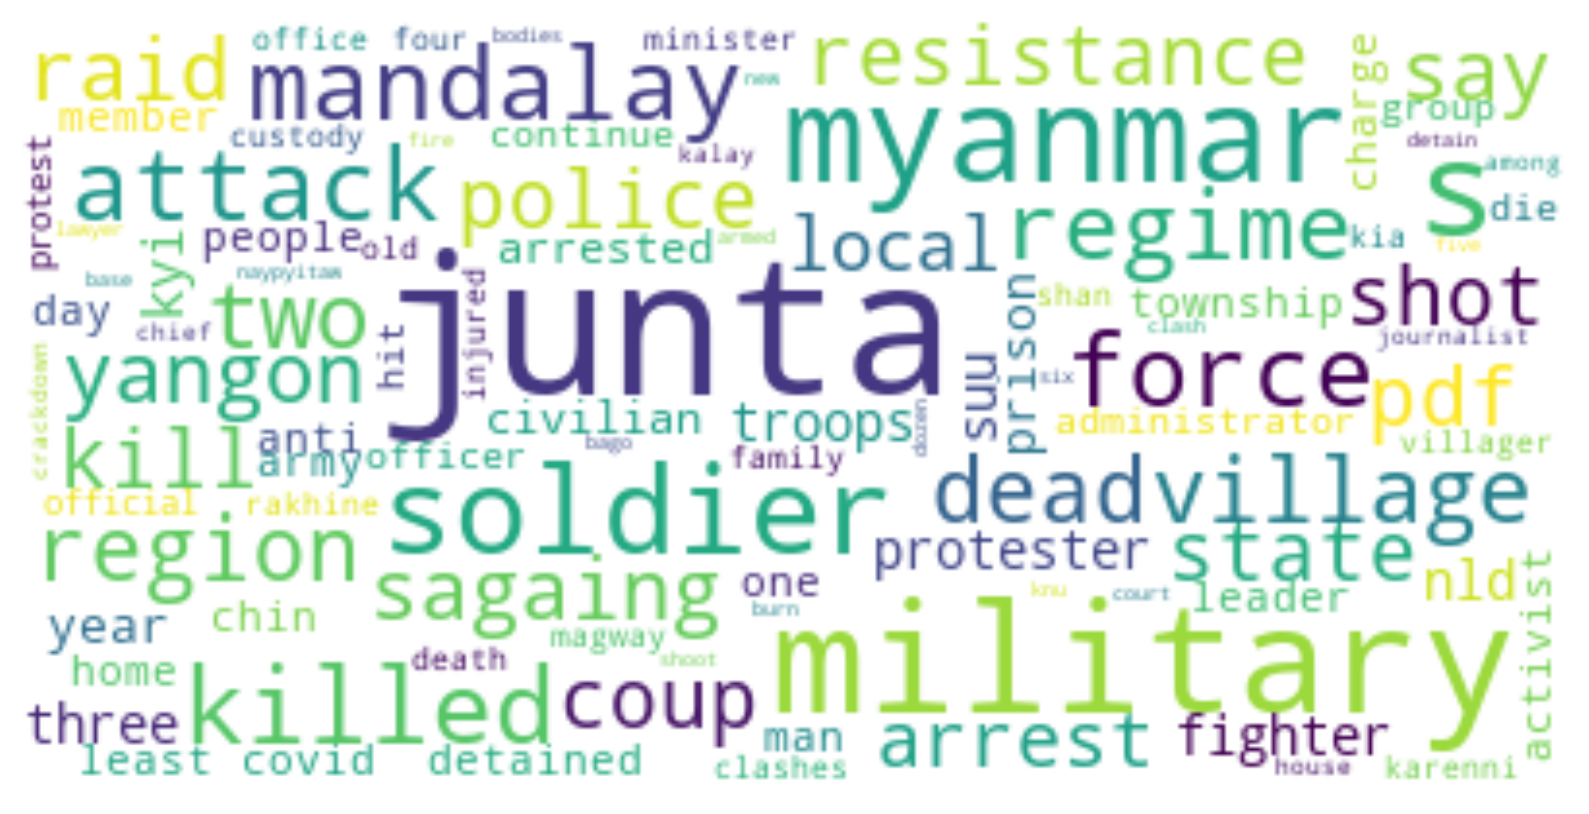

In [10]:
#max_font_size=50, max_words=100
text = " ".join(title.lower() for title in df_2021['title'])
word_cloud = WordCloud(max_font_size=50, max_words=100, collocations = False, background_color = 'white').generate(text)

from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=200)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
word_cloud.to_file("MMN_mostread\keywords_whitebg.png")

What are the frequencies of words in the headlines? 

In [10]:
# make a giant string 
s0 = ''
for title in df_2021['title']:
    s0 += ' '+ title.lower()
s0 = s0.strip()

# make a list of tuples where each tuple is (word,fq)
frequency = [] 
word_ls = s0.split(' ')  # make a list of words from all topics
for w in word_ls:
    frequency.append(word_ls.count(w))  # make a list of word frequencies
    
word_fq = list(zip(word_ls, frequency))

# convert this list into a dict
freqdict = dict(word_fq)

In [9]:
# sort this dict. You can't sort a dict directly, so convert to a list first, sort, then convert back to dict.
def sortSecond(val):
    return val[1]

In [13]:
word_to_fq = [(key, freqdict[key]) for key in freqdict]
word_to_fq.sort(key = sortSecond, reverse = True)

# removing stopwords from the dict
stopwords = ['a', 'about', 'as', 'at', 'against', 'across', 'after', 'by', 'in', 'on', 'to', 'the', 'of', 'and', 'for', 'from', 'with']

d1 = dict(word_to_fq)
for k in list(d1.keys()):
    if k in stopwords:
        del d1[k]
        
print(d1)

{'junta': 324,
 'military': 203,
 'soldiers': 134,
 'myanmar': 126,
 'mandalay': 102,
 'killed': 102,
 'two': 90,
 'regime': 80,
 'region': 76,
 'dead': 75,
 'forces': 74,
 'resistance': 73,
 'sagaing': 70,
 'police': 70,
 'yangon': 69,
 'state': 65,
 'shot': 65,
 'village': 64,
 'pdf': 62,
 'raid': 59,
 'more': 57,
 'attack': 55,
 'suu': 54,
 'troops': 52,
 'nld': 51,
 'fighters': 50,
 'three': 48,
 'says': 47,
 'protesters': 45,
 'during': 44,
 'attacks': 43,
 'arrested': 42,
 'myanmar’s': 41,
 'chin': 41,
 'one': 41,
 'detained': 41,
 'kill': 40,
 'prison': 39,
 'township': 39,
 'covid-19': 38,
 'least': 37,
 'man': 37,
 'army': 36,
 'coup': 36,
 'who': 34,
 'kyi': 34,
 'junta’s': 33,
 'people': 32,
 'local': 32,
 'his': 31,
 'arrest': 31,
 'say': 30,
 'than': 29,
 'villagers': 29,
 'over': 29,
 'dies': 28,
 'civilians': 28,
 'leader': 28,
 'custody': 27,
 'arrests': 26,
 'their': 26,
 'locals': 25,
 'up': 25,
 'force': 25,
 'charges': 25,
 'minister': 24,
 'family': 24,
 'under': 2

### What topics have grown or dropped over this period? 

Why I don't analyze this trend using the headlines I've collected from Feb-Dec 2021:
1. The top ten most common words in the news headlines contain words with related meanings (junta, military, soldiers), (killed and dead). 
2. 'myanmar' is a common keyword but tracing its trend over time might not give valuable information because the entire news website is about news from Myanmar. 
3. To extract useful information about what topics have grown or dropped over time, it is better to look at bigrams or longer because of the meaningful difference between words like "junta raid" and "junta airstrikes", as seen in the tags below.

Therefore, I will use the most recent news to analyze this trend. I need to loop through each news article to extract tags, so I will use the live website to scrape this info instead of downloading each article page. 

1. go to the Myanmar Now homepage
2. extract article links 
3. go through each article, extract tags and date of article
4. compile them into a list of tuples in the form of (tags,date)
5. sort which tags appear the most in these tuples
6. plot the tags by date

In [2]:
article_links = []
for i in range(0, 5): # pages 0-4 (for October)
    url = f"https://www.myanmar-now.org/en/news?page={i}"
    response = requests.get(url)
    response.raise_for_status()
    html = response.text
    soup = BeautifulSoup(html)
    titles = soup.find_all('div', class_ = 'news-title')
    
    for title in titles: 
        link_tag = title.find('a')
        link = link_tag.get('href')
        article_links.append(link)
    
print(len(article_links))
article_links[:3]

65


['/en/news/australian-economist-former-uk-ambassador-among-thousands-freed-in-myanmar-amnesty',
 '/en/news/police-and-officials-suspected-of-aa-ties-arrested-in-kyaukphyu',
 '/en/news/indian-state-extends-ban-on-cross-border-travel-from-myanmar']

In [3]:
# drop duplicate links because some articles are listed twice as you progress through pages
unique_article_links = []
[unique_article_links.append(link) for link in article_links if link not in unique_article_links]

print('number of duplicate links dropped:', len(article_links) - len(unique_article_links))

number of duplicate links dropped: 7


Extracting tag, date, author info from each article

In [4]:
main_page_url = 'https://www.myanmar-now.org'
topics_to_date_list = []

for link in unique_article_links:
    article_url = main_page_url + link
    response = requests.get(article_url)
    response.raise_for_status()
    html = response.text
    soup = BeautifulSoup(html)
    date = soup.find('span', class_ = 'date-display-single')
    author = soup.find('div', class_ = 'author-name')
    topic_tags = soup.find('div', class_ = 'field field-name-field-topics field-type-taxonomy-term-reference field-label-hidden view-mode-full')
    tag_list = topic_tags.find_all('a')
    tag_names = []
    
    for tag in tag_list:
        tag_names.append(tag.text.lower())  
    topics_to_date = (tag_names, date['content'].split('T')[0], author.text)
    topics_to_date_list.append(topics_to_date)

In [5]:
print('This dataset contains information about articles from', topics_to_date_list[0][1], 'to', topics_to_date_list[-1][1], '.')

This dataset contains information about articles from 2022-11-17 to 2022-10-25 .


In [6]:
# create a df with tags, publication_date, author
topics_dates_df = pd.DataFrame(topics_to_date_list, columns = ['Tags', 'Publication_date', 'Author'])
            
# convert dates into datetime object
topics_dates_df['Publication_date'] = pd.to_datetime(topics_dates_df['Publication_date'], format='%Y-%m-%d')
pd.set_option("display.max_colwidth", None) 
topics_dates_df.head()

,Tags,Publication_date,Author
0,"[amnesty, sean turnell, vicky bowman, toru kubota, kyaw htay oo]",2022-11-17,Myanmar Now
1,"[rakhine, kyaukphyu township, arakan army]",2022-11-16,Thein San
2,"[india, india-myanmar border, manipur, tamu township]",2022-11-16,Aung Naing
3,"[armed resistance, sagaing region, civilian casualties]",2022-11-16,Khin Yi Yi Zaw
4,"[bago region, idps, internally displaced persons, shwegyin township, karen national union, knu, knla, people's defence force, pdf]",2022-11-15,Esther J


Finding the most common tags and plot them over the time period covered in the dataset
1. count the frequencies of each tag
2. plot them over the range of dates in the dataset

In [ ]:
# for each row of df, check if tag is in Tags. If so, get its publication_date, add 1 to the corresponding date in the list of unique dates. 
# End result is a list of dates

In [7]:
tag_list_flattened = [tag for tags in topics_dates_df['Tags'] for tag in tags]  # make a giant list with all tags

tag_freq_dict = {}
for tag in tag_list_flattened:
    tag_freq_dict[tag] = tag_list_flattened.count(tag)
    
# tag_freq_dict

In [67]:
# Sort this frequency dictionary of tags.

tag_to_fq = [(key, tag_freq_dict[key]) for key in tag_freq_dict]
tag_to_fq.sort(key = sortSecond, reverse = True)
tag_freq_dict_sorted = dict(tag_to_fq)
# tag_freq_dict_sorted 

In [11]:
# Get all unique dates from the dataset. 
datetime_list = []
for item in set(topics_dates_df.Publication_date):
    datetime_list.append(item.date())
    
datetime_list.sort()
datetime_list

[datetime.date(2022, 10, 25),
 datetime.date(2022, 10, 26),
 datetime.date(2022, 10, 27),
 datetime.date(2022, 10, 28),
 datetime.date(2022, 10, 31),
 datetime.date(2022, 11, 1),
 datetime.date(2022, 11, 2),
 datetime.date(2022, 11, 3),
 datetime.date(2022, 11, 4),
 datetime.date(2022, 11, 5),
 datetime.date(2022, 11, 7),
 datetime.date(2022, 11, 8),
 datetime.date(2022, 11, 9),
 datetime.date(2022, 11, 10),
 datetime.date(2022, 11, 11),
 datetime.date(2022, 11, 14),
 datetime.date(2022, 11, 15),
 datetime.date(2022, 11, 16),
 datetime.date(2022, 11, 17)]

In [12]:
date_str_list = []
for date in datetime_list:
    date_str_list.append(str(date.month) + "-" + str(date.day) + "-" + str(date.year))
date_str_list

['10-25-2022',
 '10-26-2022',
 '10-27-2022',
 '10-28-2022',
 '10-31-2022',
 '11-1-2022',
 '11-2-2022',
 '11-3-2022',
 '11-4-2022',
 '11-5-2022',
 '11-7-2022',
 '11-8-2022',
 '11-9-2022',
 '11-10-2022',
 '11-11-2022',
 '11-14-2022',
 '11-15-2022',
 '11-16-2022',
 '11-17-2022']

In [13]:
# extract the 10 most common tags
most_common_tags = list(tag_freq_dict_sorted.items())[:10]
most_common_tags

[('sagaing region', 14),
 ('armed resistance', 11),
 ('rakhine state', 7),
 ('airstrikes', 6),
 ('arakan army', 5),
 ("people's defence force", 5),
 ('kio', 5),
 ('junta airstrikes', 5),
 ('kachin state', 5),
 ('internally displaced persons', 4)]

### What is the frequency of the most common tag over time?

#### Logic of first approach (didn't work): 
1. Find the first most common tag from most_common_tags. 
2. For each row of topics_dates_df, if this tag shows up in topics_dates_df['Tags'], extract that row's topics_dates_df['Publication_date'] and append it to a list. 
3. Goal is to compile a list of dates when this tag showed up.

I realized this doesn't work to compare the trends of each topic over time because each tag shows up on different dates, so the list of dates for each tag is different, making it hard to compare how each varies over a uniform timeframe. 

#### Second approach: 
1. Compile a list of unique dates from the whole dataset.
2. Make a copy of this list.
3. For each row of df, check if tag is in Tags. If so, get its publication_date, add 1 to the corresponding date in the copied list.  
3. Using the above info, create a dictionary where each key is a unique date in the dataset, and the values are the number of times the tag appeared on that date. 

In [68]:
tag1 = most_common_tags[0][0]
print('The most common tag is', tag1, '.')

tag1_dates = []
for index, row in topics_dates_df.iterrows():
    if tag1 in row['Tags']:
        tag1_dates.append(row['Publication_date'].date())
        
tag1_dates.sort()
tag1_dates

The most common tag is sagaing region .


[datetime.date(2022, 10, 25),
 datetime.date(2022, 10, 26),
 datetime.date(2022, 10, 28),
 datetime.date(2022, 10, 28),
 datetime.date(2022, 10, 31),
 datetime.date(2022, 10, 31),
 datetime.date(2022, 11, 1),
 datetime.date(2022, 11, 2),
 datetime.date(2022, 11, 7),
 datetime.date(2022, 11, 9),
 datetime.date(2022, 11, 9),
 datetime.date(2022, 11, 11),
 datetime.date(2022, 11, 14),
 datetime.date(2022, 11, 16)]

In [69]:
# Extract just the dates and reformat them.
tag1_date_str_list = []
for date in tag1_dates:
    tag1_date_str_list.append(str(date.month) + "-" + str(date.day) + "-" + str(date.year))
tag1_date_str_list

['10-25-2022',
 '10-26-2022',
 '10-28-2022',
 '10-28-2022',
 '10-31-2022',
 '10-31-2022',
 '11-1-2022',
 '11-2-2022',
 '11-7-2022',
 '11-9-2022',
 '11-9-2022',
 '11-11-2022',
 '11-14-2022',
 '11-16-2022']

In [70]:
# Count the number of duplicates for each unique date, and compile the data into a dataframe.
tag1_freqdict = {}
for date in tag1_date_str_list:
    if date in tag1_freqdict:
        tag1_freqdict[date] += 1
    else:
        tag1_freqdict[date] = 1
        
tag1_freq_df = pd.DataFrame(tag1_freqdict.items(), columns=['date', 'frequency'])
tag1_freq_df

,date,frequency
0,10-25-2022,1
1,10-26-2022,1
2,10-28-2022,2
3,10-31-2022,2
4,11-1-2022,1
5,11-2-2022,1
6,11-7-2022,1
7,11-9-2022,2
8,11-11-2022,1
9,11-14-2022,1


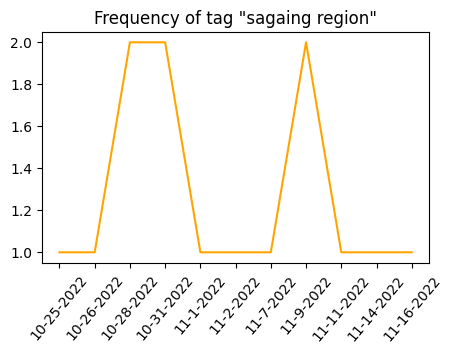

In [65]:
ax = tag1_freq_df.plot(figsize=(5,3), color='orange', title='Frequency of tag "sagaing region"', legend=False)
plt.xticks(tag1_freq_df.index, tag1_freq_df['date'], rotation= 50)
plt.show()

#### The frequency of the second most common tag over time

In [71]:
tag2 = most_common_tags[1][0]
print('The second most common tag is', tag2, '.')

tag2_dates = []
for index, row in topics_dates_df.iterrows():
    if tag2 in row['Tags']:
        tag2_dates.append(row['Publication_date'].date())
        
tag2_dates.sort()

The second most common tag is armed resistance .


In [64]:
tag2_date_str_list = []
for date in tag2_dates:
    tag2_date_str_list.append(str(date.month) + "-" + str(date.day) + "-" + str(date.year))
tag2_date_str_list

['10-26-2022',
 '10-26-2022',
 '11-1-2022',
 '11-3-2022',
 '11-9-2022',
 '11-9-2022',
 '11-11-2022',
 '11-14-2022',
 '11-15-2022',
 '11-15-2022',
 '11-16-2022']

The end result I'm envisioning is a figure with multiple suplots like below, where each subplot shows frequency information for each tag, with dates on the x axis and frequency on the y axis. 

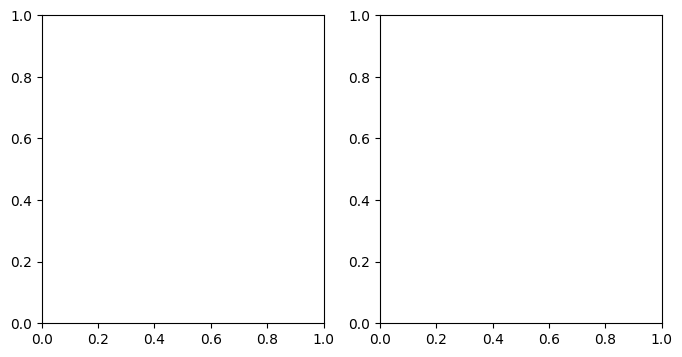

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

In [52]:
## PLS IGNORE - SCRATCH


# make a tuple (tag, date, frequency) and convert it to df
# most_common_tags[0][0] == 'sagaing region'
# tag1_df = pd.DataFrame(date_str_list, columns = ['Publication_date', 'Frequency'])

# Logic:
# for each row of topics_dates_df, if 'sagaing region' is in Tags, extract the 'Publication_date' and append it to a list
# then for the tag 'sagaing region', I will have a list of dates when this tag showed up. Then I will create a count of each unique date and plot it?

# OR
# for tag1, make a tuple (date, frequency) and convert it to df
# for each unique date in topics_dates_df, check all the tags for that date to count the number of times tag1 appears in those tags
# put that number on the count column beside the date
# plot these two columns for tag1

'sagaing region'